# PILLS Snapshot Analysis

In this analysis, we examine smart contract balances for the PILLS ERC-20 token, LP with Spirit and Beets, and the 2 most recent Neo Pools.

These density plots show relative quantities, as the absolute balances vary per-contract.
The plots can be used to answer questions like: what is the amount that most addresses controlled for a given contract.

In [1]:
source("report-helpers.R")
df = read.csv('data/2022-04-20-pills-contracts.csv.gz', colClasses=c('address'='character'))
df_lqdr = read.csv('data/lqdr-pills-gauge-balance.csv', colClasses=c('address'='character')) %>% rename(lqdr_balance=balance)
df = left_join(df, df_lqdr, by='address') %>% select(-X)

head(df)

# do not pivot address; remove from list of names(df)
df_long = pivot_longer(df, all_of(names(df)[-1]), names_to="contract_state", values_to="amount")
# head(df_long)

df_neo_pools = df_long %>% filter(contract_state %in% c('neo_pool_0_amount', 'neo_pool_1_amount'))
# head(df_neo_pools)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,address,pills_erc20_balance,beets_lp_erc20_balance,neo_pool_0_amount,neo_pool_0_reward_debt,neo_pool_1_amount,neo_pool_1_reward_debt,spirit_amount,spirit_reward_debt,lqdr_balance
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0x9C775D3D66167685B2A3F4567B548567D2875350,2.415931e+06,0,0.00,0.000,0,0,0,0,0
2,0xF04588329c3104779796F279A9df3803Ae83dB7B,0.000000e+00,0,50659.89,1463.820,0,0,0,0,0
3,0x326A7D91B6F767458599E7d93DFc850d2e083d30,2.882333e+06,0,0.00,0.000,0,0,0,0,0
4,0x2728e32174FC95De00695007c9134fA03dC8b434,0.000000e+00,0,53376.32,1611.751,0,0,0,0,0
5,0xD488F4585Ab28D003324253be5D791aC103c0b57,8.730000e-16,0,0.00,0.000,0,0,0,0,0
6,0x4BC4Da7839a3c987D44F0DBDAcBDd1f53243Ba24,0.000000e+00,0,0.00,0.000,0,0,0,0,0


In [2]:
neo_pool_addresses = t(as.data.frame(fromJSON(file="data/neo-pools.json", simplify=F)))
neo_pool_addresses = as.data.frame(neo_pool_addresses)
names(neo_pool_addresses) = c('value')
rownames(neo_pool_addresses) = NULL
neo_pool_addresses = neo_pool_addresses %>% filter(stringr::str_detect(value, "^0x"))
neo_pool_addresses = neo_pool_addresses$value
neo_pool_addresses

[1] "0x7A93C6dDEbc2089F6D5bcccF1025d6D0E31d4DA4"
 [2] "0x47775F72E8bfa98dE4613db6cD4b5772aC4aBEC8"
 [3] "0x5406566EDCD5B108212Bb69382a8869D761E738E"
 [4] "0xdf3A3D03a92F54f8859355924f4581443B80C714"
 [5] "0x7373E5b59bf20345b0D452f9a294A51429ca1F9b"
 [6] "0x9bd3dACe24745Eb117c1F7f93AAEC5e37333c079"
 [7] "0x7928de9d6DB88280DBa4613864a518A98F32D342"
 [8] "0xaDb29fBBb9962Fe643676e2433114F0446923221"
 [9] "0x60131EC5BE073F1c34A9b506ce30eA7aAC7eed15"
[10] "0x62CfcABA772e90F743990A8bcEDAC04AbBF7E75f"
[11] "0x7E01c21789DEF6572E31Ab6c67A4182E0808428B"
[12] "0x2D5F05D8e578397889f5F5C88d8e3b81D8a6f865"
[13] "0x578fb737cf5F3814Ddd80Cd6a7b4FFF9504c0c39"
[14] "0xb6bA5d27b00c2E62e32c0716D7c6505463cFBbf2"
[15] "0xb31bF9a835584d18595d886D35157467576A76e8"
[16] "0xde1592f643F9c77f186970daa43D3cAB22C0fd22"
[17] "0xeF5627d8B7BC8102E0C9760F62E0c5b0b7F38AF6"
[18] "0x80da05De8B759B7A9399F43C04A859cC0eaA24AC"
[19] "0x983A4dA9E8baC8b8F2F04B161968906B780f3629"
[20] "0x63AD93bAb2842Fefec06630b9ddC7A2351D7cb91"
[21] "0x616a0030688329b4FaaFda8Cf469f1899e58cBfC"
[22] "0x94005434C078e9d8cC23fF4b5D88FC9bc7c0E1A5"
[23] "0xc948EaD0069adc742539c7D6e038CD132010513D"
[24] "0x5D29690d7e9f4216dFE3F15C0A2db828D25e9aD5"
[25] "0x40F4F6473F39882645237f39900fc15C2E8dd56c"
[26] "0xA75C807d43F75806DFbDd1f302C7F388E610Be87"
[27] "0x04f429bBFa7032a046F24466F835284351Cef5E4"
[28] "0xC60044503dA0C800DEE0577f294862Fc1c1Aca1B"
[29] "0xbC4f8A55fc3Aba02dA4E18aA66E9176EA476468D"
[30] "0xF6d428f7ee882C0bdd43AA060c69f35874609B9f"
[31] "0x11d7A542ad2E12Bd0C033C85aeF6FB891CD92690"
[32] "0x23308c96cF9f46Fa6D7Ee714B960780551d35E16"
[33] "0xc8C017674fb54F5F25f05AC0981116715465254A"
[34] "0xCCA9F9E68F7E7e1BE97DA2Ff91B016c234a13c88"
[35] "0xA431fDd6d23f0d7C4b4B92F4aD866a5939b53abB"
[36] "0x326A7D91B6F767458599E7d93DFc850d2e083d30"
[37] "0x5bcb5f2ed10ac292c9e281c5ead4f0533666c3b6"

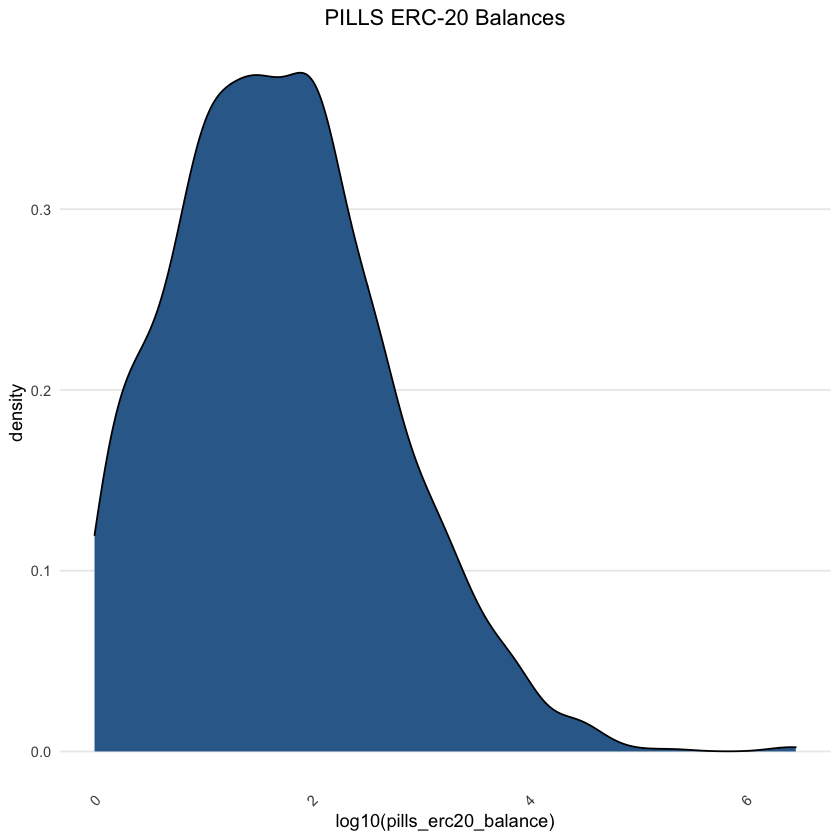

In [3]:
ggplot(data=df %>% filter(pills_erc20_balance>=1), aes(x=log10(pills_erc20_balance), fill=1)) +
    idm_theme +
    geom_density() +
    ggtitle("PILLS ERC-20 Balances") +
    theme(legend.position="none")

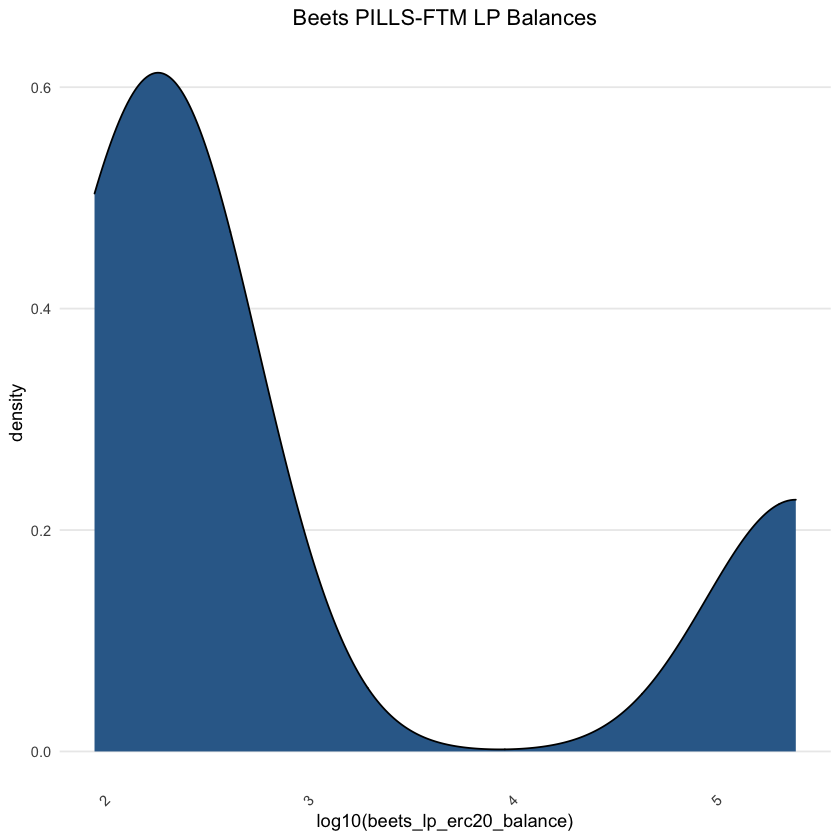

In [4]:
ggplot(data=df %>% filter(beets_lp_erc20_balance>=1), aes(x=log10(beets_lp_erc20_balance), fill=1)) +
    idm_theme +
    geom_density() +
    ggtitle("Beets PILLS-FTM LP Balances") +
    theme(legend.position="none")

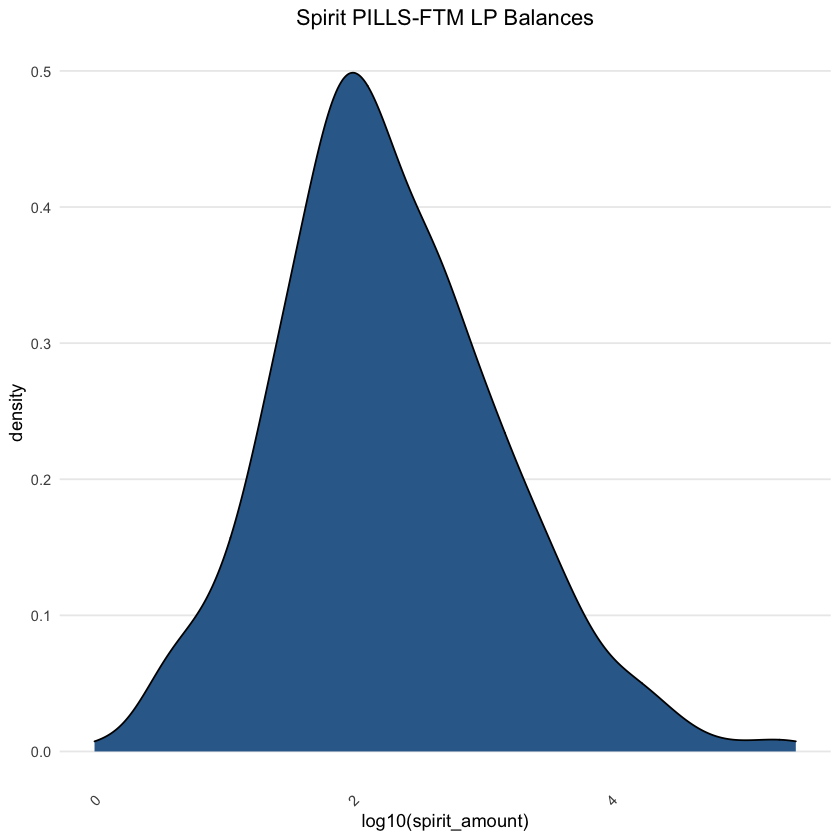

In [5]:
ggplot(data=df %>% filter(spirit_amount>=1), aes(x=log10(spirit_amount), fill=1)) +
    idm_theme +
    geom_density() +
    ggtitle("Spirit PILLS-FTM LP Balances") +
    theme(legend.position="none")

## Neo Pools

Since there are 2 Neo Pools to consider, the distributions are a little more interesting.
Looking at the relative densities are misleading in this case: the absolute quantity of PILLS is vastly different between the 2 pools.

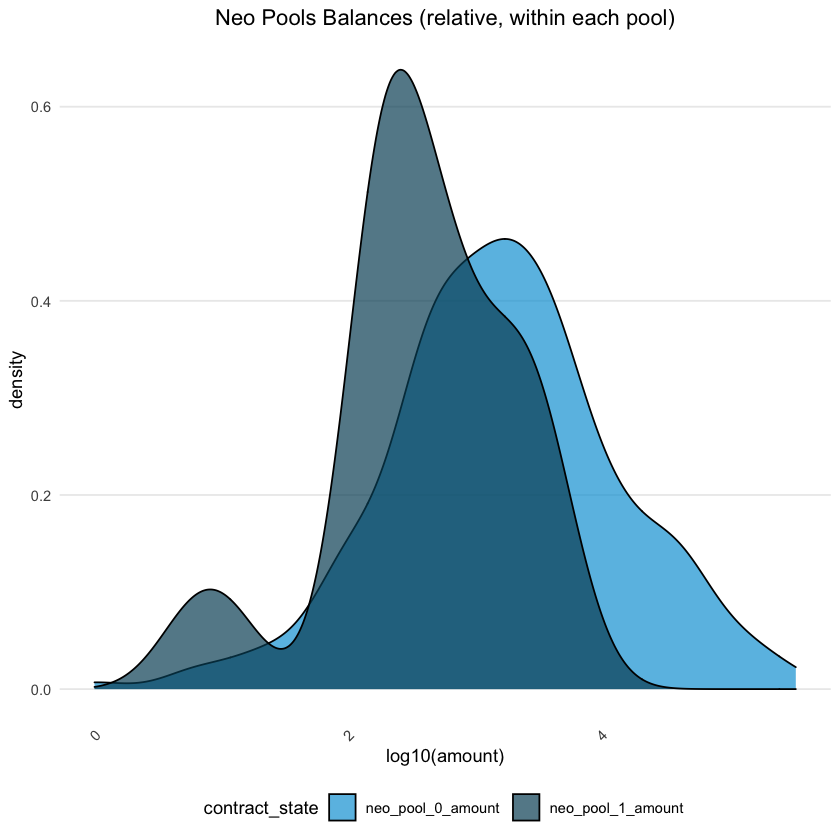

In [6]:
ggplot(data=df_neo_pools %>% filter(amount>=1), aes(x=log10(amount), fill=contract_state)) +
    geom_density(alpha=0.7) +
    idm_theme +
    scale_fill_economist() +
    ggtitle("Neo Pools Balances (relative, within each pool)")

The magnitude of the differences in PILLS volumes can be seen in this histogram, which shows the comparison in absolute terms.
We can see most of the volume was migrated to the Neo Pool that was current in April, 2022.

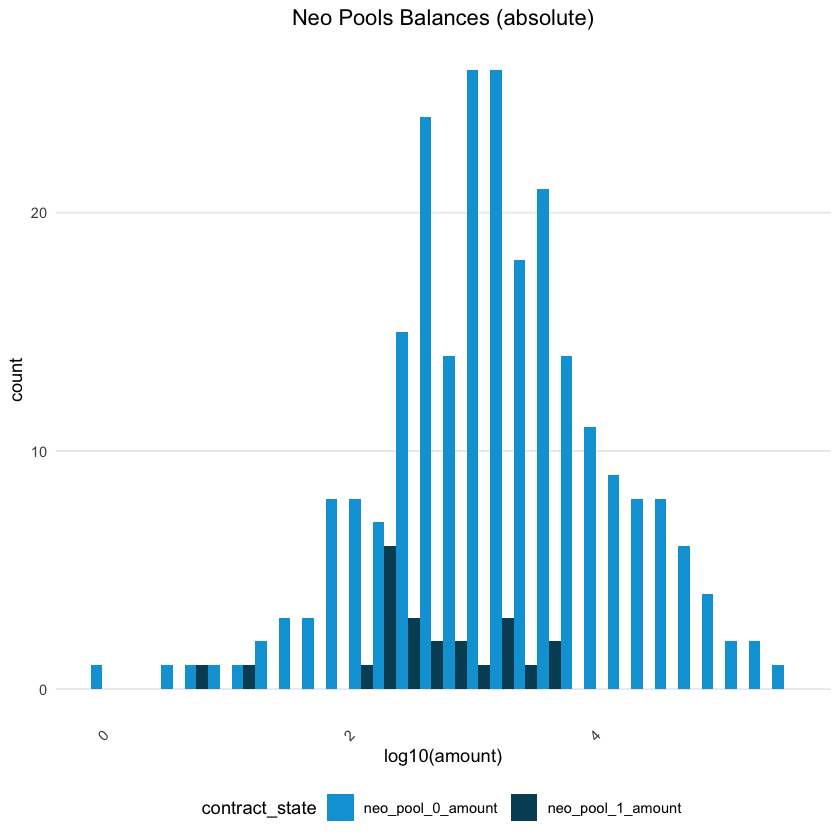

In [7]:
ggplot(data=df_neo_pools %>% filter(amount>=1), aes(x=log10(amount), fill=contract_state)) +
    geom_histogram(bins=30, position=position_dodge()) +
    idm_theme +
    scale_fill_economist() +
    ggtitle("Neo Pools Balances (absolute)")

## Total PILLS identified

In [8]:
pills_total = sum(df$pills_erc20_balance)
pills_total

[1] 6714972

In [9]:
sum(df$neo_pool_0_amount)
sum(df$neo_pool_1_amount)

[1] 2882333

[1] 23166.16

In [10]:
# Treasury
treasury_volume = df_long %>% 
  filter(address=='0xd12FaB721684540F7D2E3dfD22205bAF83FF3D82') %>% 
  filter(contract_state=='pills_erc20_balance') %>% 
  pull(amount)
treasury_volume

[1] 35189.01

In [11]:
# Active Neo Pool (active then, that is)
neo_pool_0_volume = df_long %>% 
  filter(address=='0x326A7D91B6F767458599E7d93DFc850d2e083d30') %>% 
  filter(contract_state=='pills_erc20_balance') %>% 
  pull(amount)
neo_pool_0_volume

[1] 2882333

In [12]:
# Previous Neo Pool
neo_pool_1_volume = df_long %>% 
  filter(address=='0xA431fDd6d23f0d7C4b4B92F4aD866a5939b53abB') %>% 
  filter(contract_state=='pills_erc20_balance') %>% 
  pull(amount)
neo_pool_1_volume

[1] 23166.16

In [13]:
all_neo_pool_volume = df_long %>% 
  filter(address %in% neo_pool_addresses) %>% 
  filter(contract_state=='pills_erc20_balance') %>% 
  pull(amount)
neo_pool_total = sum(all_neo_pool_volume)

other_neo_pool_total = neo_pool_total - neo_pool_1_volume - neo_pool_0_volume
other_neo_pool_total

[1] 336780.6

In [14]:
# PILLS staked as Spirit LP
spirit_pills_volume = df_long %>% 
  filter(address=='0x9C775D3D66167685B2A3F4567B548567D2875350') %>% 
  filter(contract_state=='pills_erc20_balance') %>% 
  pull(amount)
spirit_pills_volume

[1] 2415931

In [15]:
# PILLS staked as Beets LP
beets_pills_volume = df_long %>% 
  filter(address=='0x20dd72Ed959b6147912C2e529F0a0C651c33c9ce') %>% 
  filter(contract_state=='pills_erc20_balance') %>% 
  pull(amount)
beets_pills_volume

[1] 206397

In [16]:
# nothing for Liquid Driver; this accumulates LP tokens, not PILLS ERC-20
df_long %>% 
  filter(address=='0x3A514Ce911E86164064F30Bf9134085Ae0E514aC') %>% 
  filter(contract_state=='spirit_amount') %>% 
  pull(amount)

numeric(0)

In [17]:
# wallet balances are what remains
wallet_volume = pills_total - neo_pool_total - spirit_pills_volume - beets_pills_volume
wallet_volume

[1] 850364.2

## Spirit LP Identified

In [18]:
spirit_lp_volume = sum(df$spirit_amount)
spirit_lp_volume

#df$spirit_pills = spirit_pills_volume * (df$spirit_amount / spirit_lp_volume)
#sum(df$spirit_pills)

[1] 1154250

## Liquid Driver LP Identified

In [19]:
lqdr_spirit_lp_total = 1193965.9342080164

lqdr_lp_total = sum(df$lqdr_balance)
lqdr_lp_total

df$lqdr_pills = spirit_pills_volume * (df$lqdr_balance / lqdr_lp_total)
sum(df$lqdr_pills)

[1] 34409.46

[1] 2415931

## Beets LP Identified

In [21]:
beets_lp_volume = sum(df$beets_lp_erc20_balance)

df$beets_pills = beets_pills_volume * (df$beets_lp_erc20_balance / beets_lp_volume)
sum(df$beets_pills)

[1] 206397

## PILLS Volume Trace

This Sankey diagram traces all PILLS:

1. originating from the ERC-20 contract
2. through intermediary contracts including Neo Pools and Liquidity Pools
3. ultimately to the addresses that controlled PILLS during the snapshot

In [22]:
nodes = data.frame("name" = c(
    "PILLS ERC-20", # Node 0
    "Snapshot", # Node 1
    "Spirit LP", # Node 2
    "Beets LP", # Node 3
    "Liquid Driver", # Node 4
    "Neo Pool Active", # Node 5
    "Neo Pool Previous", # Node 6
    "Neo Pool Others", # Node 7
    "Wallet", # Node 8
    "Treasury" # Node 9
))

# from, to, value
links = as.data.frame(matrix(c(
    0, 2, spirit_pills_volume,
    0, 3, beets_pills_volume,
    2, 4, spirit_pills_volume,
    0, 5, neo_pool_0_volume,
    0, 6, neo_pool_1_volume,
    0, 7, other_neo_pool_total,
    0, 8, wallet_volume,
    0, 9, treasury_volume,
    4, 1, spirit_pills_volume,
    3, 1, sum(df$beets_pills),
    5, 1, neo_pool_0_volume,
    6, 1, neo_pool_1_volume,
    7, 1, other_neo_pool_total,
    8, 1, wallet_volume,
    9, 1, treasury_volume
), byrow = TRUE, ncol = 3))

names(links) = c("source", "target", "value")

sankeyNetwork(Links = links, Nodes = nodes,
    Source = "source", Target = "target",
    Value = "value", NodeID = "name",
    fontSize= 12, nodeWidth = 30)

HTML widgets cannot be represented in plain text (need html)

## Coalescing Addresses

In [23]:
df$pills_staked = df$lqdr_pills + df$neo_pool_0_amount + df$neo_pool_1_amount + df$beets_pills
sum(df$pills_staked)

[1] 5527827

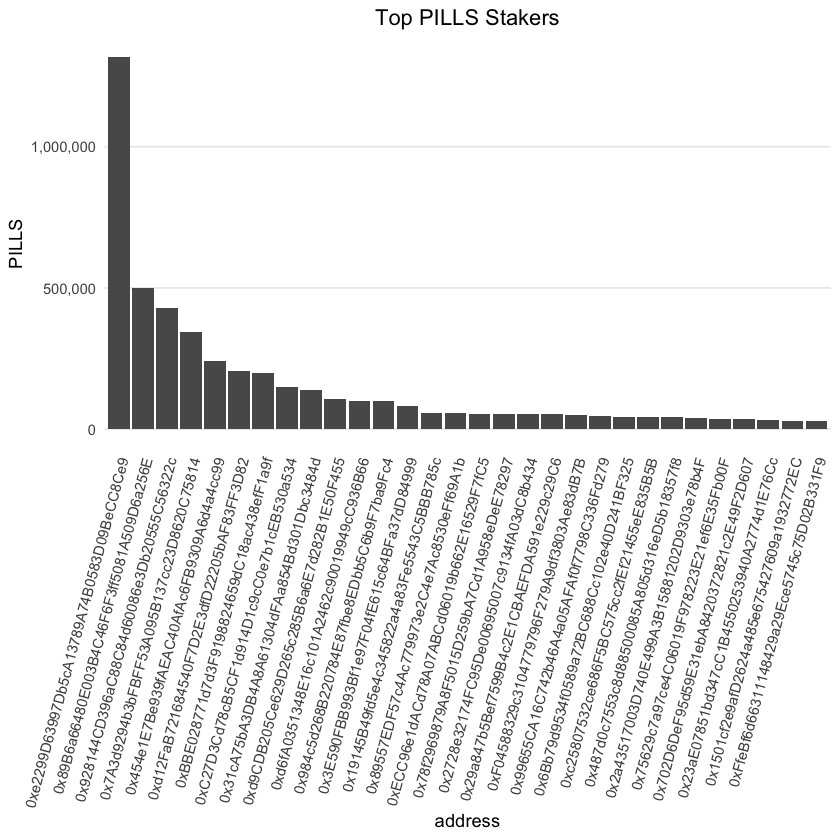

In [24]:
top_stakers = df %>% arrange(desc(pills_staked)) %>% slice(1:30)
top_stakers$address = factor(top_stakers$address, levels=top_stakers$address)
# top_stakers %>% slice(1:5)

ggplot(top_stakers, aes(x=address, y=pills_staked)) +
    geom_bar(stat="identity") +
    idm_theme +
    ggtitle("Top PILLS Stakers") +
    ylab("PILLS") +
    xlab("address") +
    scale_y_continuous(labels=scales::comma) +
    theme(axis.text.x = element_text(angle = 75, hjust = 1))

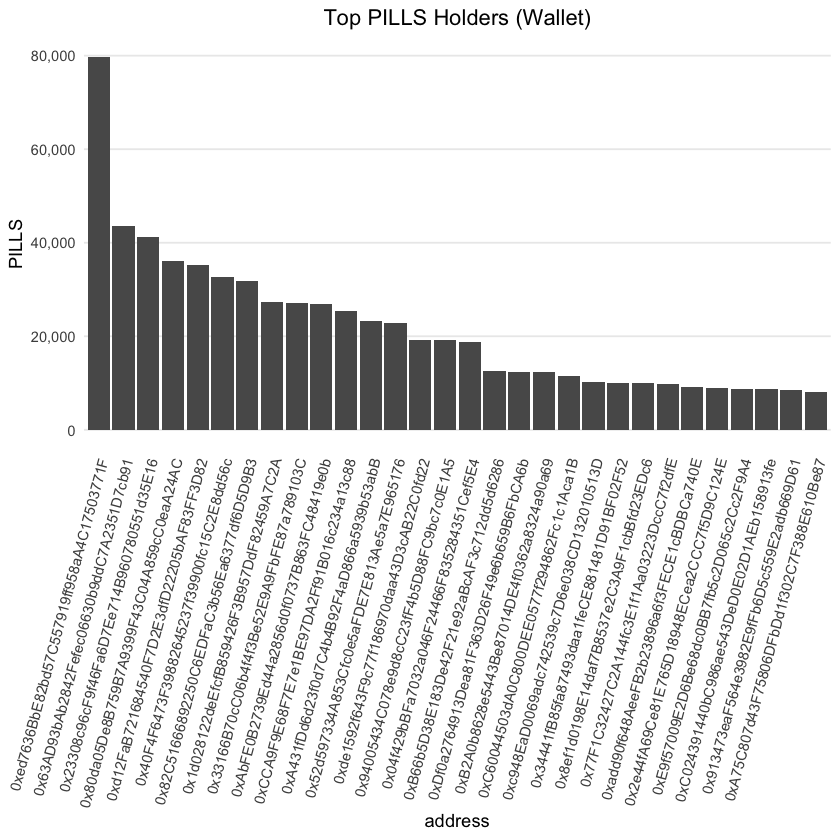

In [26]:
top_pills = df %>% filter(pills_erc20_balance<2e5) %>% arrange(desc(pills_erc20_balance)) %>% slice(1:30)
top_pills$address = factor(top_pills$address, levels=top_pills$address)
# top_pills %>% slice(1:5)

ggplot(top_pills, aes(x=address, y=pills_erc20_balance)) +
    geom_bar(stat="identity") +
    idm_theme +
    ggtitle("Top PILLS Holders (Wallet)") +
    ylab("PILLS") +
    xlab("address") +
    scale_y_continuous(labels=scales::comma) +
    theme(axis.text.x = element_text(angle = 75, hjust = 1))